In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r"C:\Users\User\Downloads\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

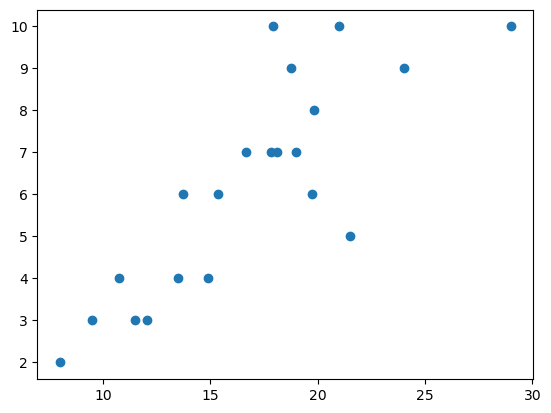

In [4]:
plt.scatter(df["Delivery Time"],df["Sorting Time"])
plt.xlabel(df["Delivery Time"])
plt.ylabel(df["Sorting Time"])
plt.show

In [5]:
#fit the model
x = df.iloc[:,0:1]
y = df.iloc[:,1:]
x

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [6]:
y

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [8]:
y_pred=model.predict(x)

In [9]:
df["Delivery_time Prediction"] = y_pred
df

,Delivery Time,Sorting Time,Delivery_time Prediction
0,21.00,10,7.931943
1,13.50,4,4.828866
2,19.75,6,7.414763
3,24.00,9,9.173174
4,29.00,10,11.241892
5,15.35,6,5.594291
6,19.00,7,7.104456
7,9.50,3,3.173891
8,17.90,10,6.649338
9,18.75,9,7.001020


In [10]:
#Error finding
from sklearn.metrics import mean_squared_error

In [11]:
mean_squared_error(df["Delivery Time"],df["Delivery_time Prediction"])

120.80035574313024

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(df["Delivery Time"],df["Delivery_time Prediction"])

-3.924956307673005

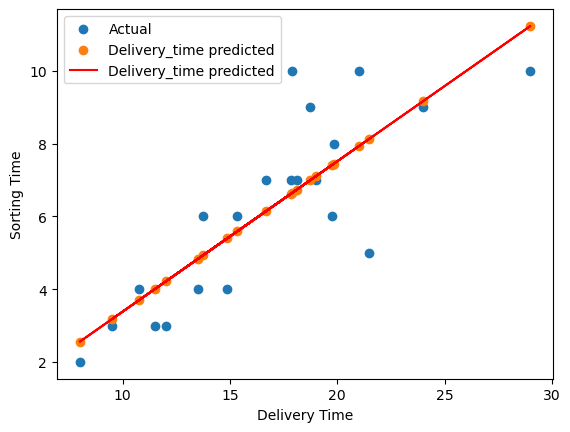

In [14]:
plt.scatter(df['Delivery Time'],df['Sorting Time'],label="Actual")
plt.scatter(df['Delivery Time'],df['Delivery_time Prediction'],label="Delivery_time predicted")
plt.plot(df['Delivery Time'],y_pred,label="Delivery_time predicted",color='red')
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.legend()
plt.show()

# No transformation

In [15]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Sorting Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    6.12e-15
Time:                        01:28:01   Log-Likelihood:                         -37.082
No. Observations:                  21   AIC:                                      76.16
Df Residuals:                      20   BIC:                                      77.21
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Delivery Time     0.3723      0.018     20.603      0.000       0.335       0.410
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.597
Skew:                           0.399   Prob(JB):                        0.742
Kurtosis:                       3.217   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation of X

In [17]:
x_log = np.log(df['Sorting Time'])

In [18]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Sorting Time   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1018.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    1.25e-18
Time:                        01:29:26   Log-Likelihood:                         -28.172
No. Observations:                  21   AIC:                                      58.34
Df Residuals:                      20   BIC:                                      59.39
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     3.6942      0.116     31.913      0.000       3.453       3.936
==============================================================================
Omnibus:                        3.197   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.616
Skew:                           0.776   Prob(JB):                        0.270
Kurtosis:                       2.236   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation of Y

In [20]:
y_log = np.log(df['Delivery Time'])

In [21]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              613.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    1.77e-16
Time:                        01:31:19   Log-Likelihood:                         -15.083
No. Observations:                  21   AIC:                                      32.17
Df Residuals:                      20   BIC:                                      33.21
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Delivery Time     0.1570      0.006     24.763      0.000       0.144       0.170
==============================================================================
Omnibus:                        4.866   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                2.811
Skew:                          -0.821   Prob(JB):                        0.245
Kurtosis:                       3.720   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation of X & Y

In [23]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    5.72e-17
Time:                        01:32:18   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Sq Root Transformation of X

In [25]:
x_sqrt = np.sqrt(df['Sorting Time'])

In [26]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Sorting Time   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              656.6
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    9.10e-17
Time:                        01:33:50   Log-Likelihood:                         -32.671
No. Observations:                  21   AIC:                                      67.34
Df Residuals:                      20   BIC:                                      68.39
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.6405      0.103     25.624      0.000       2.426       2.855
==============================================================================
Omnibus:                        2.939   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                1.557
Skew:                           0.361   Prob(JB):                        0.459
Kurtosis:                       1.878   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation of Y

In [28]:
y_sqrt = np.sqrt(df['Delivery Time'])

In [29]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1028.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    1.14e-18
Time:                        01:35:21   Log-Likelihood:                         -17.853
No. Observations:                  21   AIC:                                      37.71
Df Residuals:                      20   BIC:                                      38.75
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Delivery Time     0.2318      0.007     32.055      0.000       0.217       0.247
==============================================================================
Omnibus:                        4.387   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.450
Skew:                          -0.769   Prob(JB):                        0.294
Kurtosis:                       3.658   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation of X & Y

In [31]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    2.10e-20
Time:                        01:36:26   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""